# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [19]:
import palmerpenguins
from palmerpenguins import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from plotnine import *

In [11]:
penguin = load_penguins()
penguin = pd.get_dummies(penguin,columns = ["sex","island","species"])
penguin = penguin.dropna()
penguin.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen,species_Adelie,species_Chinstrap,species_Gentoo
0,39.1,18.7,181.0,3750.0,2007,False,True,False,False,True,True,False,False
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,True,True,False,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,True,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,True,True,False,False
5,39.3,20.6,190.0,3650.0,2007,False,True,False,False,True,True,False,False


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [23]:
y = penguin["bill_depth_mm"]
X = penguin.drop(columns=["bill_depth_mm"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [27]:
# Multiple linear regression model
ct = ColumnTransformer(
    [
        ("standardize", StandardScaler(), make_column_selector(dtype_include=["int64", "float64"])),
        ("onehot", OneHotEncoder(handle_unknown="ignore"), make_column_selector(dtype_include=["object", "category"]))
    ],
    remainder="passthrough" 
)

lr_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("linear_regression", LinearRegression())
    ]
)
neg_mse_scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -neg_mse_scores
lr = mse_scores.mean()

In [38]:
#KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn_pipeline = Pipeline(
    [
        ("preprocessing", ct), 
        ("knn", knn)
    ]
)
neg_mse_scores_knn = cross_val_score(knn_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores_knn = -neg_mse_scores_knn
knn1 = mse_scores_knn.mean()


In [34]:
#KNN model 2
knn = KNeighborsRegressor(n_neighbors=2)
knn_pipeline = Pipeline(
    [
        ("preprocessing", ct), 
        ("knn", knn)
    ]
)
neg_mse_scores_knn = cross_val_score(knn_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores_knn = -neg_mse_scores_knn
knn2 = mse_scores_knn.mean()

In [35]:

decision_tree = DecisionTreeRegressor(random_state=42)

dt_pipeline = Pipeline(
    [
        ("preprocessing", ct), 
        ("decision_tree", decision_tree)
    ]
)

neg_mse_scores_dt = cross_val_score(dt_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores_dt = -neg_mse_scores_dt
dt = mse_scores_dt.mean()


In [39]:
df = pd.DataFrame({
    "Model Type": ["Linear","Knn 5","Knn 2","Decision Tree"],
    "MSE": [lr,knn1,knn2,dt]
})
df

,Model Type,MSE
0,Linear,1.876530
1,Knn 5,1.358657
2,Knn 2,1.560081
3,Decision Tree,4.035642


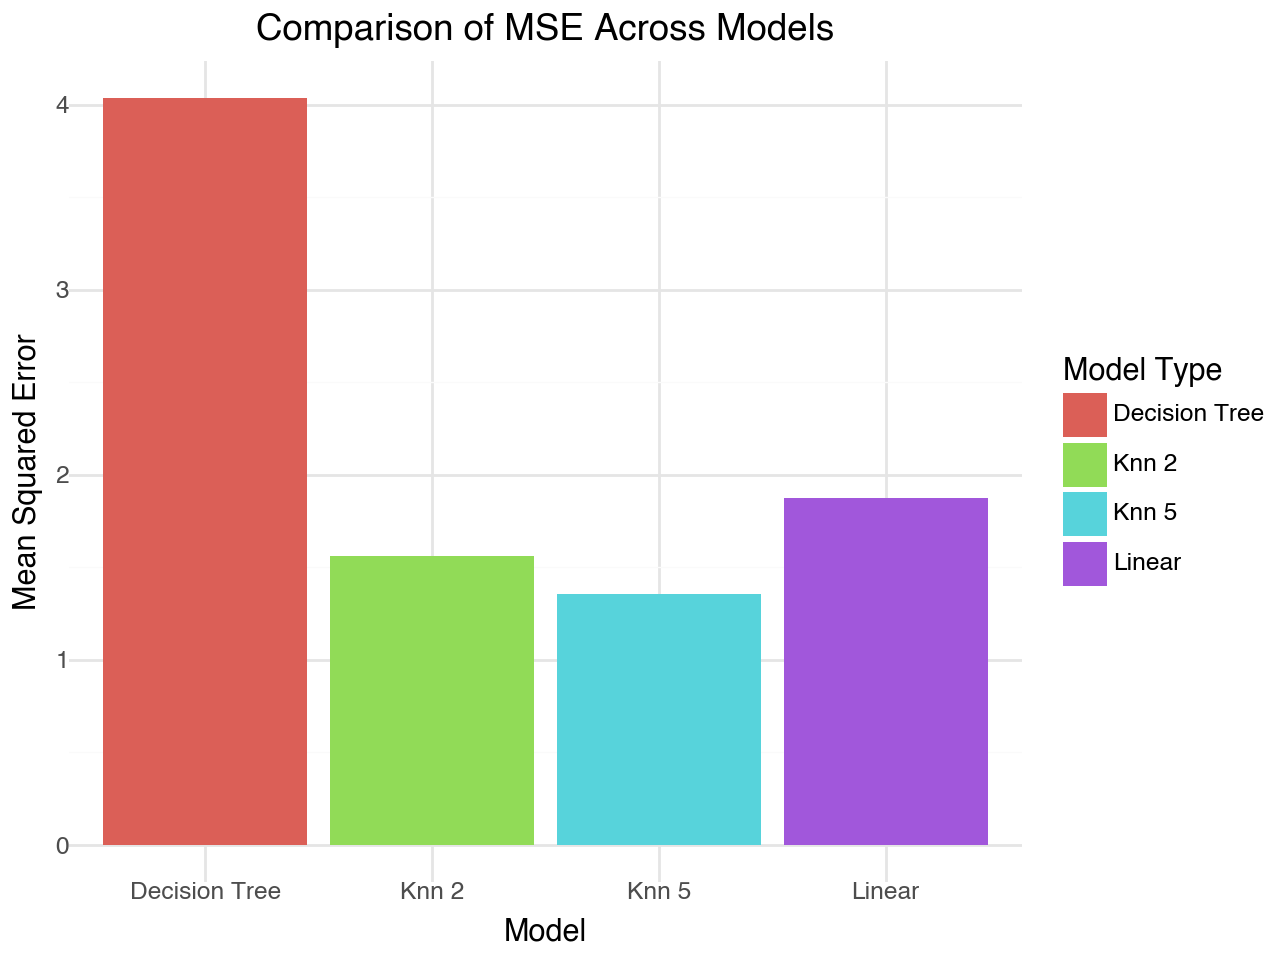

In [41]:
(
    ggplot(df, aes(x="Model Type", y="MSE", fill="Model Type")) +
    geom_bar(stat="identity", position="dodge") +
    labs(
        title="Comparison of MSE Across Models",
        x="Model",
        y="Mean Squared Error"
    ) +
    theme_minimal()
)


My best model was the K nearest neighbors where K was equal to 5